In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn
from d2l import torch as d2l

class LinearRegression(d2l.Module):  #@save
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)
        
        
@d2l.add_to_class(LinearRegression)  #@save
def forward(self, X):
    #print(self.net.weight.grad)
    return self.net(X)


@d2l.add_to_class(LinearRegression)  #@save
def loss(self, y_hat, y):
    fn = nn.MSELoss()
    return fn(y_hat, y)


@d2l.add_to_class(LinearRegression)  #@save
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)

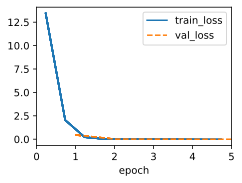

In [2]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

In [3]:
@d2l.add_to_class(LinearRegression)  #@save
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b()

print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

print(model.net.weight.grad)

error in estimating w: tensor([-1.9360e-04, -2.3603e-05])
error in estimating b: tensor([-2.6703e-05])
tensor([[-0.0002,  0.0104]])


KeyboardInterrupt: 

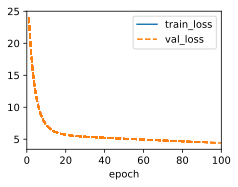

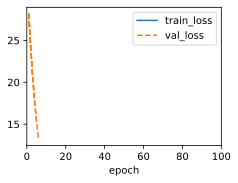

In [4]:
# 3. Функция для тренировки модели
def train_and_evaluate(model, data, max_epochs):
    trainer = d2l.Trainer(max_epochs=max_epochs)
    trainer.fit(model, data)
    return model.net.weight.detach(), model.net.bias.detach()

# 4. Тестирование модели для разных объемов данных
data_sizes = [5, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000]
errors_w = []
errors_b = []

# Истинные параметры
true_w = torch.tensor([2, -3.4]).reshape(2, 1)
true_b = 4.2

# Проводим тесты для разных объемов данных
for size in data_sizes:
    data = d2l.SyntheticRegressionData(w=true_w, b=true_b, num_train=size, num_val=size)
    model = LinearRegression(lr=0.03)
    
    # Обучение модели и получение оценок параметров
    estimated_w, estimated_b = train_and_evaluate(model, data, max_epochs=100)

    # Ошибки в оценке w и b
    error_w = torch.norm(estimated_w - true_w).item()  # Норма разницы для w
    error_b = torch.abs(estimated_b - true_b).item()  # Абсолютное отклонение для b

    # Сохраняем ошибки
    errors_w.append(error_w)
    errors_b.append(error_b)

# 5. Визуализация результатов
plt.figure(figsize=(12, 6))

# Ошибки для w
plt.subplot(1, 2, 1)
plt.plot(data_sizes, errors_w, marker='o', label="Ошибка в оценке w")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Размер данных')
plt.ylabel('Ошибка в оценке w')
plt.title('Ошибка в оценке w от объема данных')
plt.grid(True)

# Ошибки для b
plt.subplot(1, 2, 2)
plt.plot(data_sizes, errors_b, marker='o', label="Ошибка в оценке b", color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Размер данных')
plt.ylabel('Ошибка в оценке b')
plt.title('Ошибка в оценке b от объема данных')
plt.grid(True)

plt.tight_layout()
plt.savefig('jpnotebook2.png')